# Customer Churn Model

###
Key Features:

    CustomerID: Unique identifier for each customer.
    Age: Age of the customer, reflecting their demographic profile.
    Gender: Gender of the customer (Male or Female).
    Tenure: Duration (in months) the customer has been with the service provider.
    MonthlyCharges: The monthly fee charged to the customer.
    ContractType: Type of contract the customer is on (Month-to-Month, One-Year, Two-Year).
    InternetService: Type of internet service subscribed to (DSL, Fiber Optic, None).
    TechSupport: Whether the customer has tech support (Yes or No).
    TotalCharges: Total amount charged to the customer (calculated as MonthlyCharges * Tenure).
    Churn: Target variable indicating whether the customer has churned (Yes or No).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# Load the dataset
df = pd.read_csv('telco.csv')

In [5]:
df.head()

,Customer ID,Gender,Age,Tenure,InternetService,ContractType,MonthlyCharges,TotalCharges,Churn
0,8779-QRDMV,Male,78,1,DSL,Month-to-Month,39.65,39.65,Yes
1,7495-OOKFY,Female,74,8,Fiber Optic,Month-to-Month,80.65,633.30,Yes
2,1658-BYGOY,Male,71,18,Fiber Optic,Month-to-Month,95.45,1752.55,Yes
3,4598-XLKNJ,Female,78,25,Fiber Optic,Month-to-Month,98.50,2514.50,Yes
4,4846-WHAFZ,Female,80,37,Fiber Optic,Month-to-Month,76.50,2868.15,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      7043 non-null   object 
 1   Gender           7043 non-null   object 
 2   Age              7043 non-null   int64  
 3   Tenure           7043 non-null   int64  
 4   InternetService  5517 non-null   object 
 5   ContractType     7043 non-null   object 
 6   MonthlyCharges   7043 non-null   float64
 7   TotalCharges     7043 non-null   float64
 8   Churn            7043 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 495.3+ KB


In [7]:
df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Tenure                0
InternetService    1526
ContractType          0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [8]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Count the values in the 'InternetService' column
df['InternetService'].value_counts()

InternetService
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

In [9]:
df['InternetService'] = df['InternetService'].fillna('')

In [10]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    3035
DSL            1652
               1526
Cable           830
Name: count, dtype: int64

In [11]:
df.isna().sum()


Customer ID        0
Gender             0
Age                0
Tenure             0
InternetService    0
ContractType       0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [12]:
df.head()

,Customer ID,Gender,Age,Tenure,InternetService,ContractType,MonthlyCharges,TotalCharges,Churn
0,8779-QRDMV,Male,78,1,DSL,Month-to-Month,39.65,39.65,Yes
1,7495-OOKFY,Female,74,8,Fiber Optic,Month-to-Month,80.65,633.30,Yes
2,1658-BYGOY,Male,71,18,Fiber Optic,Month-to-Month,95.45,1752.55,Yes
3,4598-XLKNJ,Female,78,25,Fiber Optic,Month-to-Month,98.50,2514.50,Yes
4,4846-WHAFZ,Female,80,37,Fiber Optic,Month-to-Month,76.50,2868.15,Yes


In [13]:
df.describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,32.386767,64.761692,2280.381264
std,16.750352,24.542061,30.090047,2266.220462
min,19.000000,1.000000,18.250000,18.800000
25%,32.000000,9.000000,35.500000,400.150000
50%,46.000000,29.000000,70.350000,1394.550000
75%,60.000000,55.000000,89.850000,3786.600000
max,80.000000,72.000000,118.750000,8684.800000


In [14]:
df_numeric = df.select_dtypes(include=[np.number])

In [15]:
df_numeric.describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,32.386767,64.761692,2280.381264
std,16.750352,24.542061,30.090047,2266.220462
min,19.000000,1.000000,18.250000,18.800000
25%,32.000000,9.000000,35.500000,400.150000
50%,46.000000,29.000000,70.350000,1394.550000
75%,60.000000,55.000000,89.850000,3786.600000
max,80.000000,72.000000,118.750000,8684.800000


In [16]:
df_numeric.corr()

,Age,Tenure,MonthlyCharges,TotalCharges
Age,1.000000,0.009927,0.144685,0.059684
Tenure,0.009927,1.000000,0.247582,0.826074
MonthlyCharges,0.144685,0.247582,1.000000,0.651236
TotalCharges,0.059684,0.826074,0.651236,1.000000


<Axes: >

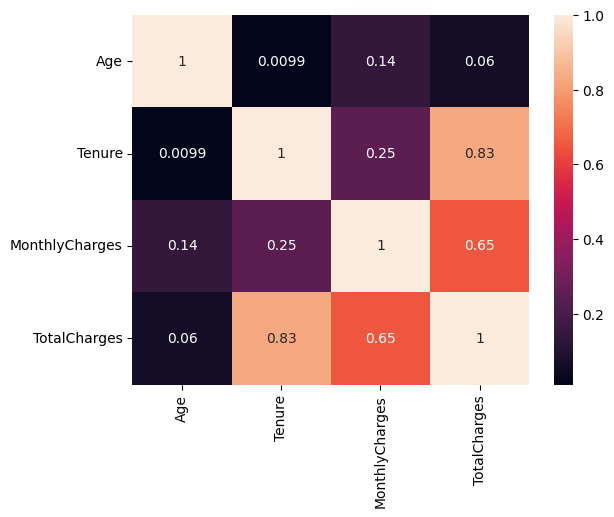

In [17]:
sns.heatmap(df_numeric.corr(), annot=True)

In [18]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [19]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [20]:
df.groupby(['Churn', 'Gender'] ) ['MonthlyCharges'].mean()

Churn  Gender
No     Female    61.664908
       Male      60.876914
Yes    Female    74.812087
       Male      74.066989
Name: MonthlyCharges, dtype: float64

In [21]:
df.head()

,Customer ID,Gender,Age,Tenure,InternetService,ContractType,MonthlyCharges,TotalCharges,Churn
0,8779-QRDMV,Male,78,1,DSL,Month-to-Month,39.65,39.65,Yes
1,7495-OOKFY,Female,74,8,Fiber Optic,Month-to-Month,80.65,633.30,Yes
2,1658-BYGOY,Male,71,18,Fiber Optic,Month-to-Month,95.45,1752.55,Yes
3,4598-XLKNJ,Female,78,25,Fiber Optic,Month-to-Month,98.50,2514.50,Yes
4,4846-WHAFZ,Female,80,37,Fiber Optic,Month-to-Month,76.50,2868.15,Yes


In [22]:
df.groupby('Churn')['Age'].mean()

Churn
No     45.344414
Yes    49.735688
Name: Age, dtype: float64

In [23]:
df.groupby('ContractType')['MonthlyCharges'].mean()

ContractType
Month-to-Month    65.586191
One Year          65.658258
Two Year          62.442990
Name: MonthlyCharges, dtype: float64

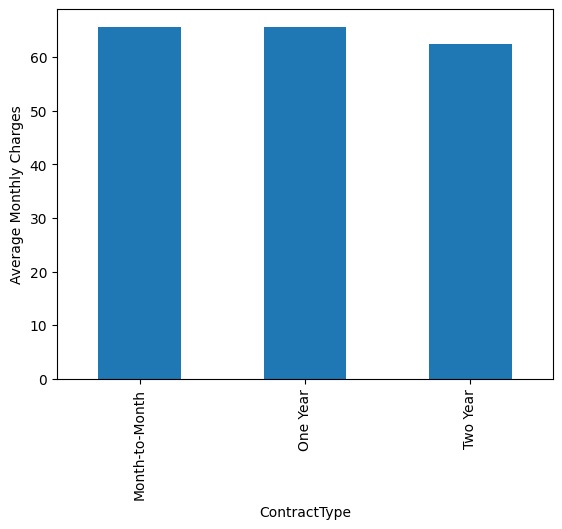

In [24]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.ylabel('Average Monthly Charges')
plt.show()

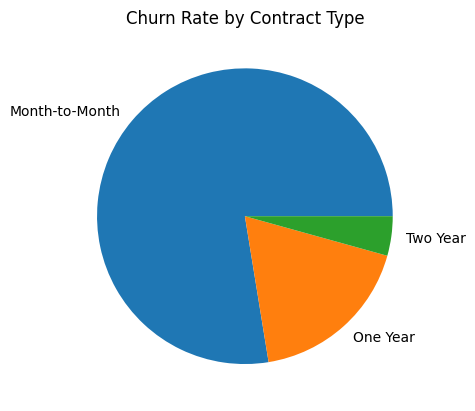

In [25]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.groupby('ContractType')['Churn'].mean().plot(kind='pie')
plt.ylabel('')
plt.title('Churn Rate by Contract Type')
plt.show()

In [26]:
df.head(1)


,Customer ID,Gender,Age,Tenure,InternetService,ContractType,MonthlyCharges,TotalCharges,Churn
0,8779-QRDMV,Male,78,1,DSL,Month-to-Month,39.65,39.65,1


In [27]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [28]:
x = df[['Age', 'MonthlyCharges', 'Gender', 'Tenure']]
y = df[['Churn']]
x


,Age,MonthlyCharges,Gender,Tenure
0,78,39.65,1,1
1,74,80.65,0,8
2,71,95.45,1,18
3,78,98.50,0,25
4,80,76.50,0,37
...,...,...,...,...
7038,30,21.15,0,72
7039,38,84.80,1,24
7040,30,103.20,0,72
7041,32,29.60,0,11


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=62)

In [30]:
x_train

,Age,MonthlyCharges,Gender,Tenure
6643,64,79.25,1,32
1038,80,25.45,1,71
665,71,85.35,0,22
5104,22,38.50,0,8
4270,62,44.00,1,1
...,...,...,...,...
1082,76,24.95,1,54
3339,49,80.15,0,2
2163,24,20.15,0,8
1617,23,88.35,1,1


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
y_pred


array([0, 1, 0, ..., 0, 0, 0], shape=(2113,))

In [35]:
print("Accuracy",score)
print("Classification Report",report)



Accuracy 0.7974443918599148
Classification Report               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1566
           1       0.65      0.47      0.54       547

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.80      0.79      2113



In [36]:
penalty = ['l1', 'l2','elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = [0.01, 0.1, 1, 10, 100]

param = dict(penalty=penalty, solver=solver, C=C)
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [37]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param, scoring='accuracy', cv=cv, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [38]:
y_pred_grid = grid.predict(x_test)
score_grid = accuracy_score(y_test, y_pred_grid)
print(score_grid)
y_pred_grid

0.7983909133932797


array([0, 1, 0, ..., 0, 0, 0], shape=(2113,))

In [39]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [40]:
from sklearn.neighbors import KNeighborsClassifier


In [41]:
paramk = dict(n_neighbors=[3, 5, 7, 9], weights=['uniform', 'distance'])
gridk = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=paramk, scoring='accuracy', cv=cv, n_jobs=-1)
gridk.fit(x_train, y_train)
y_pred_gridk = gridk.predict(x_test)
score_gridk = accuracy_score(y_test, y_pred_gridk)
y_pred_gridk

array([0, 1, 0, ..., 0, 0, 0], shape=(2113,))

In [42]:
score_gridk


0.7770941788925698

In [43]:
from sklearn.svm import SVC
svm = SVC()
param_svc = dict(kernel=['linear', 'rbf', 'poly'], C=[0.01, 0.1, 1, 10, 100])
grid_svc = GridSearchCV(estimator = svm, param_grid=param_svc, scoring='accuracy', cv=cv, n_jobs=-1)
grid_svc.fit(x_train, y_train)
y_svcpred = grid_svc.predict(x_test)
score_svc = accuracy_score(y_test, y_svcpred)

In [44]:
score_svc

0.8002839564600095

In [45]:
y_svcpred

array([0, 1, 0, ..., 0, 0, 0], shape=(2113,))

In [46]:
from sklearn.tree import DecisionTreeClassifier
param_tree = dict(criterion=['gini', 'entropy'], max_depth=[3, 5, 7, 9])
grid_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_tree, scoring='accuracy', cv=cv, n_jobs=-1)
grid_tree.fit(x_train, y_train)
y_treepred = grid_tree.predict(x_test)
score_tree = accuracy_score(y_test, y_treepred)
print(score_tree)
y_treepred

0.7813535257927118


array([0, 1, 0, ..., 0, 0, 0], shape=(2113,))

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
param_rfc = dict(n_estimators=[16,32,64,128], max_features=['auto', 'sqrt', 'log2'])
grid_rfc = GridSearchCV(estimator=rfc_model, param_grid=param_rfc, scoring='accuracy', cv=cv, n_jobs=-1)
grid_rfc.fit(x_train, y_train)
y_rfc_pred = grid_rfc.predict(x_test)
score_rfc = accuracy_score(y_test, y_rfc_pred)
score_rfc

0.7766209181258874

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
param_gbc = dict(n_estimators=[16,32,64,128], learning_rate=[0.01, 0.1, 0.2], max_depth=[3, 5, 7])
grid_gbc = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_gbc, scoring='accuracy', cv=cv, n_jobs=-1)
grid_gbc.fit(x_train, y_train)
y_gbc_pred = grid_gbc.predict(x_test)
score_gbc = accuracy_score(y_test, y_gbc_pred)
print(score_gbc)

0.8017037387600567


In [49]:
from sklearn.ensemble import AdaBoostClassifier
param_abc = dict(n_estimators=[16,32,64,128], learning_rate=[0.01, 0.1, 0.2])
grid_abc = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_abc, scoring='accuracy', cv=cv, n_jobs=-1)
grid_abc.fit(x_train, y_train)
y_abc_pred = grid_abc.predict(x_test)
score_abc = accuracy_score(y_test, y_abc_pred)
print(score_abc)

0.8017037387600567


In [50]:
best_model = grid_gbc.best_estimator_

In [51]:
joblib.dump(best_model, "model.pkl")

['model.pkl']